### Netflix Content Strategy Analysis with Python

-   In the competitive landscape of streaming services, understanding content strategy is paramount to capturing and retaining an audience. This project aims to dissect and analyze Netflix's content strategy using Python, leveraging various data analysis techniques.

-   Through this analysis, we'll explore patterns and trends in Netflix's catalog, including genre distribution, release patterns, and audience engagement metrics. By utilizing Python libraries such as Pandas, Matplotlib, and Seaborn, we'll uncover insights that can inform strategic decisions for content acquisition and production.

### Importing Liberaries & Cleanning The Dataset

In [60]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Netflix Content Strategy\netflix_content.csv')

df = df_original.copy()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [61]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show


-   Notice that the Hours Viewed column dtype is not a numerical format, we need to convert it to a float instead

In [62]:
# converting the column to a float instead of a string
df['Hours Viewed'] = df['Hours Viewed'].replace(',', '', regex=True).astype(float)

df['Hours Viewed'].head()

0    812100000.0
1    665100000.0
2    622800000.0
3    507700000.0
4    503000000.0
Name: Hours Viewed, dtype: float64

### Dataset Exploration (EDA):
-   ### Points to Explore:
    -   1. Global Availability Analysis
    -   2. Release Date Analysis
    -   3. Hours Viewed Analysis
    -   4. Language Analysis
    -   5. Seasonal Analysis
    -   6. Correlation Analysis

#### 1. Global Availability Analysis
-  How many titles are available globally?
    

In [63]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show


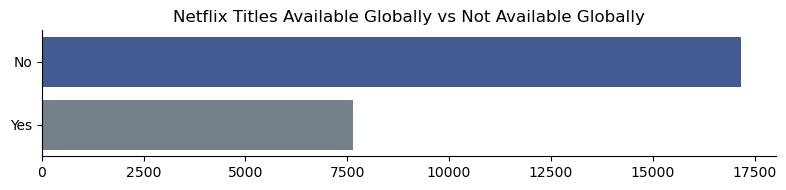

In [64]:
# Count the Titles Available Globally vs The Titles not Available Globally.
df_global_availability = df['Available Globally?'].value_counts().to_frame().reset_index()

plt.figure(figsize=(8, 2))

colors = ['#3557A0', 'slategrey']
sns.barplot(data=df_global_availability,
                x='count',
                y='Available Globally?', 
                palette=colors,
                
                )

plt.title('Netflix Titles Available Globally vs Not Available Globally')
plt.xlabel('')
plt.ylabel('')


sns.despine()
plt.tight_layout()
plt.show()

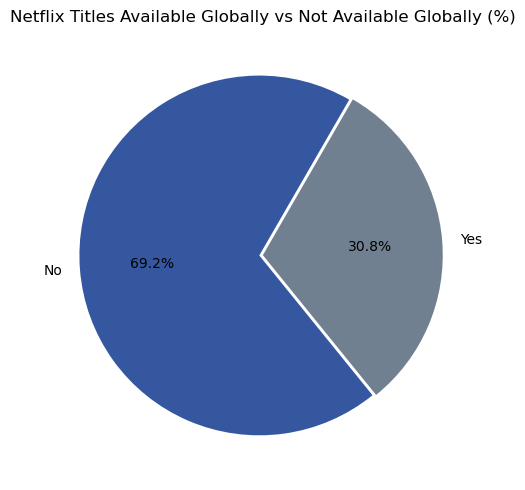

In [65]:
# Let's calculate the percentage of Titles Available Globally vs The Titles not Available Globally.
df_global_availability['percentage'] = ((df_global_availability['count'] / df_global_availability['count'].sum()) * 100).round(2)

plt.figure(figsize=(5, 5))

colors = ['#3557A0', 'slategrey']
plt.pie(df_global_availability['count'], 
        labels=df_global_availability['Available Globally?'], 
        autopct='%1.1f%%', 
        colors=colors,
        startangle=60,
        explode=(0.02, 0),
                
        )


plt.title('Netflix Titles Available Globally vs Not Available Globally (%)')
plt.tight_layout()
plt.show()

-   #### Key Insights:
    -  A significant majority, 69.2%, of the analyzed entities are not available globally. This indicates a substantial portion of the content is restricted or limited in its distribution.
    -  The large portion of "No" suggests there might be regional restrictions, licensing issues, or strategic decisions in place that limit global availability. Understanding these reasons can help in developing strategies to overcome these barriers.

#### 2. Release Date Analysis
- 
    

In [66]:
# Convert the 'Release Date' column to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Extract year, month, and day from the 'Release Date' column
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
df['Day'] = df['Release Date'].dt.day

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  float64       
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
 6   Year                 8166 non-null   float64       
 7   Month                8166 non-null   float64       
 8   Day                  8166 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.7+ MB


In [67]:
df['Year'].isna().sum()

16646

In [68]:
# convert the Year column to an integer
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)

# Convert the Month column to an integer
df['Month'] = pd.to_numeric(df['Month'], errors='coerce').fillna(0).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  float64       
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
 6   Year                 24812 non-null  int32         
 7   Month                24812 non-null  int32         
 8   Day                  8166 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 1.5+ MB


In [69]:
# Group the data by year and count the number of movies released each year
df_release_date = df.groupby('Year').size().reset_index(name='Count')

df_release_date

,Year,Count
0,0,16646
1,2010,16
2,2011,6
3,2012,2
4,2013,21
5,2014,49
6,2015,147
7,2016,336
8,2017,596
9,2018,974


- ### Note:
    -  In the dataset, was fount 16646 titles without the release date.

    -  The large number of missing values (16646) in the release date poses a challenge in understanding the complete picture of Netflix's content release history. Here are some potential reasons for these missing values:

        -   The data collection process might have had limitations or inconsistencies, leading to missing or incomplete information.

        -   Some content types might have less defined release dates, such as documentaries or stand-up specials, making it difficult to accurately record their release dates.

        -   Netflix might not have released the exact release dates for all its content due to privacy concerns or contractual agreements with content creators.

        -   Human error during data entry could have resulted in missing or incorrect release dates.


- ##### **To ensure the accuracy and reliability of our findings, I have decided to exclude rows with missing release dates from our analysis.**

In [70]:
# Drop the first row as it contains the value 0
df_release_date = df_release_date.drop([0])

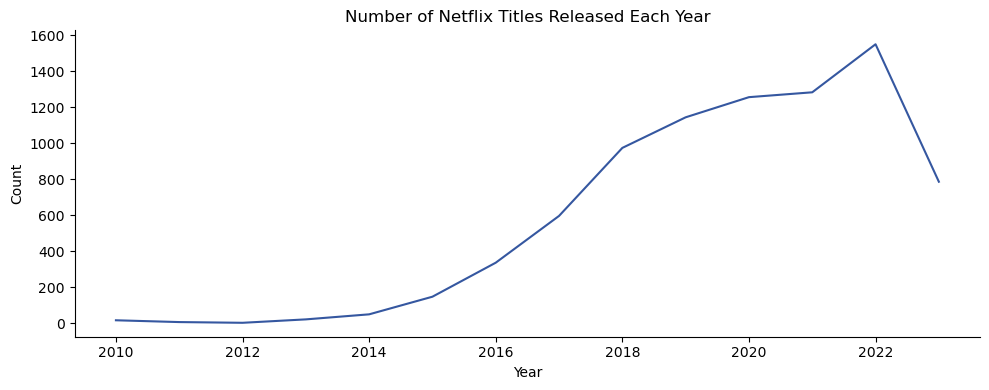

In [71]:
plt.figure(figsize=(10, 4))

sns.lineplot(data=df_release_date, 
             x='Year', 
             y='Count', 
             marker='', 
             color='#3557A0'
             
             )

plt.title('Number of Netflix Titles Released Each Year')



sns.despine()
plt.tight_layout()
plt.show()

-   #### Key Insights:
    -  The chart shows a clear upward trend in the number of Netflix titles released each year from 2010 to 2022. This indicates that Netflix has been steadily expanding its content library over time.
    -  The growth rate appears to be increasing over time. The slope of the line is steeper in recent years, suggesting that Netflix has been adding content at a faster pace.

    -  However, it's important to note that the dataset only includes titles that were released after 2010. Therefore, the growth rate may not be representative of the entire Netflix content history.

-   Specific Observations:

    -   *Peak in 2021:* The number of titles released reached a peak in 2021.
    -   *Drop in 2022:* There was a noticeable drop in the number of titles released in 2022. This could be attributed to various factors, such as changes in content acquisition strategies, market saturation, or the impact of the COVID-19 pandemic on production schedules.

#### 3. Hours Viewed Analysis:
- What is the distribution of viewing hours on Netflix between movies and shows?
- What is the distribution of viewing hours on Netflix by different languages?

    

In [72]:
# Average viewed hours
average_hours_viewed = df['Hours Viewed'].mean()

average_hours_viewed

6384084.314041593

In [73]:
# Calculate hours viewed for each content type
hours_viewed_by_content_type = df.groupby('Content Type')['Hours Viewed'].sum().to_frame().reset_index()
hours_viewed_by_content_type = hours_viewed_by_content_type.sort_values(by='Hours Viewed',ascending=False)

hours_viewed_by_content_type

,Content Type,Hours Viewed
1,Show,1.077641e+11
0,Movie,5.063780e+10


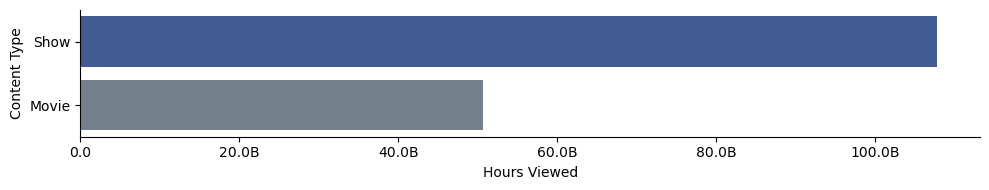

In [74]:

colors = ['#3557A0', 'slategrey']

plt.figure(figsize=(10, 2))

# Define a custom function to format tick labels with billion abbreviation
def billion_formatter(value, params):
    """Formats tick labels to display billions with abbreviation."""
    if value >= 1e9:
        return f"{value / 1e9:.1f}B"
    else:
        return f"{value:.1f}"

sns.barplot(data=hours_viewed_by_content_type,
                x='Hours Viewed',
                y='Content Type',
                palette=colors,
                
)

# Format y-axis tick labels
plt.gca().xaxis.set_major_formatter(billion_formatter)


sns.despine()
plt.tight_layout()
plt.show()


-   #### Key Insights:
    -  Shows have been viewed for approximately 100.0 billion hours, which is double the hours viewed for movies (approximately 50.0 billion hours).
    -  This data suggests that viewers are more inclined to spend their time watching shows rather than movies. This could be due to the episodic nature of shows, which often keep viewers engaged over a longer period.
    -  Movies have been viewed for approximately 50.0 billion hours, which is significantly less than the hours viewed for shows (approximately 100.0 billion hours). This could be due to the length and brevity of movies, which can make them more accessible to viewers.

In [75]:
# Selecting the top 15 titles by hours view
top_15_viewed = df.nlargest(15, 'Hours Viewed')
top_15_viewed

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Year,Month,Day
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,2023,3,23.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,2023,1,5.0
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie,2023,6,17.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,2022,12,30.0
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000.0,English,Show,2023,8,31.0
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,2022,11,23.0
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,2023,5,4.0
5,You: Season 4,Yes,2023-02-09,440600000.0,English,Show,2023,2,9.0
6,La Reina del Sur: Season 3,No,2022-12-30,429600000.0,English,Show,2022,12,30.0
7,Outer Banks: Season 3,Yes,2023-02-23,402500000.0,English,Show,2023,2,23.0


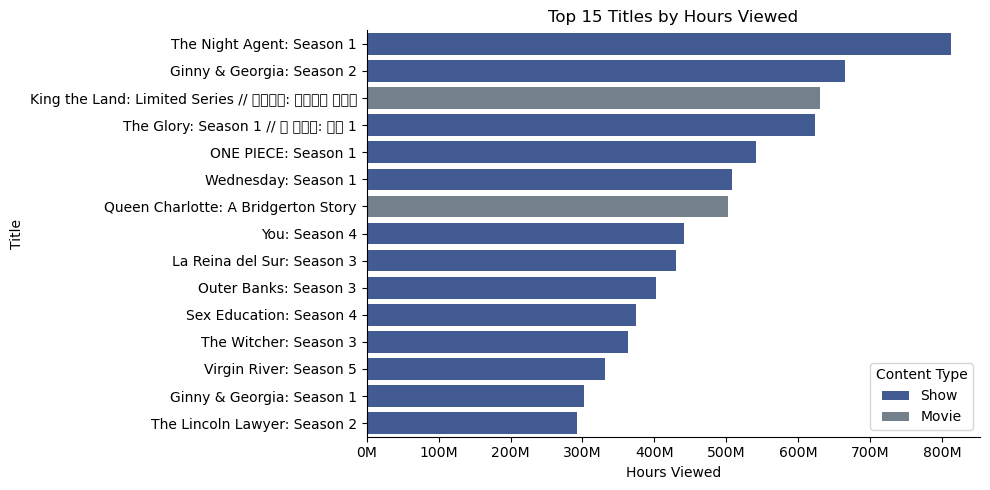

In [90]:

colors = ['#3557A0', 'slategrey']

plt.figure(figsize=(10, 5))

sns.barplot(data=top_15_viewed,
                x='Hours Viewed',
                y='Title',
                hue='Content Type',
                palette=colors,
                
                )

def billion_formatter(value, params):
    """Formats tick labels to display billions with abbreviation."""
    if value >= 1e9:
        return f"{value / 1e9:.1f}B"
    elif value <= 1e9:
        return f"{value / 1e6:.0f}M"
    else:
        return f"{value:.1f}"
# Format y-axis tick labels
plt.gca().xaxis.set_major_formatter(billion_formatter)

plt.title('Top 15 Titles by Hours Viewed')


sns.despine()
plt.tight_layout()
plt.show()

-   #### Key Insights:
    -  The Night Agent: Season 1" stands out with approximately 800 million hours viewed, making it the most-watched title on the list. Following closely is "Ginny & Georgia: Season 2" with around 600 million hours viewed.
    -  The top 15 titles consist mostly of TV shows, with only a few movies making the list. This indicates a strong preference for serialized content among viewers.
    -  Titles like "La Reina del Sur: Season 3" show that international content is also drawing significant viewership, highlighting the global reach of streaming platforms.

______

#### 4. Language Analysis:
- What is the distribution of viewing hours on Netflix by different languages?

    

##### Counting the titles of each language


In [77]:
# Languages distribution
languages_distribution = df['Language Indicator'].value_counts().to_frame()

languages_distribution

,count
Language Indicator,
English,17268
Non-English,3252
Japanese,2297
Korean,1582
Hindi,374
Russian,39


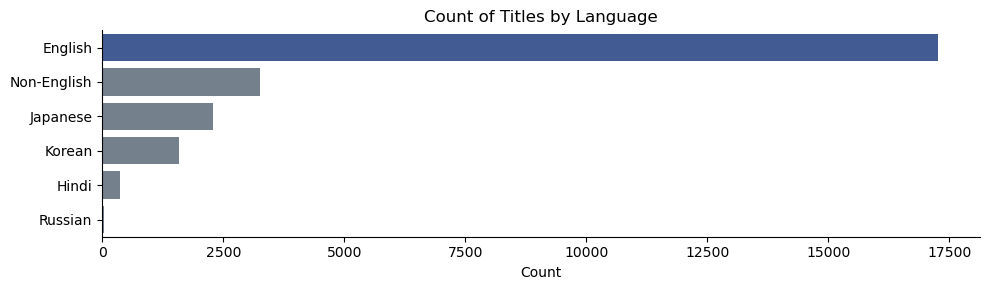

In [78]:

colors = ['#3557A0'] + ['slategrey'] * (len(languages_distribution)-1) # make the first color is blue and the rest are grey

plt.figure(figsize=(10, 3))

sns.barplot(data=languages_distribution,
            x='count',
            y='Language Indicator',
            palette=colors,
            
    
)

plt.xlabel('Count')
plt.ylabel('')
plt.title('Count of Titles by Language')

sns.despine()
plt.tight_layout()
plt.show()


-   #### Key Insights:
    -  English titles far exceed others, with approximately 17,000 titles. This suggests a strong preference or larger market for English-language content.
    -  With around 5,000 titles, non-English content also has a significant presence, indicating a diverse audience.
    -  Japanese (3,500 titles) and Korean (2,500 titles) content are prominent, reflecting the popularity of content from these regions.

##### Analyzing the viewership across different languages

In [79]:
languages_viewership = df.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False).to_frame()

languages_viewership

,Hours Viewed
Language Indicator,
English,1.244417e+11
Korean,1.537840e+10
Non-English,1.043910e+10
Japanese,7.102000e+09
Hindi,9.261000e+08
Russian,1.146000e+08


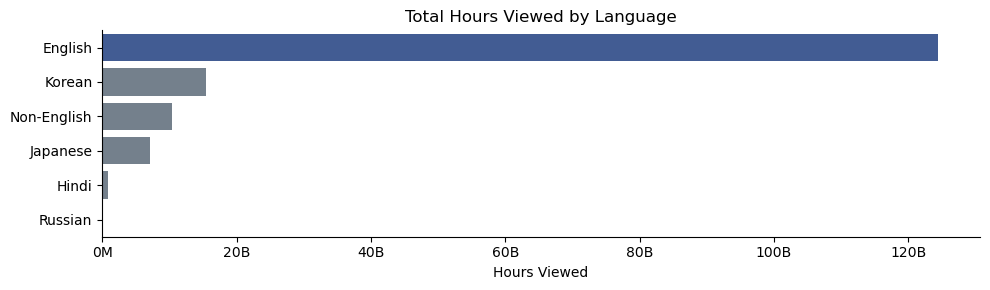

In [80]:
plt.figure(figsize=(10, 3))

sns.barplot(data=languages_viewership,
            x='Hours Viewed',
            y='Language Indicator',
            palette=colors,           
)


def billion_formatter(value, params):
    """Formats tick labels to display billions with abbreviation."""
    if value >= 1e9:
        return f"{value / 1e9:.0f}B"
    elif value <= 1e9:
        return f"{value / 1e6:.0f}M"
    else:
        return f"{value:.1f}"
# Format y-axis tick labels
plt.gca().xaxis.set_major_formatter(billion_formatter)

plt.title('Total Hours Viewed by Language')
plt.ylabel('')


sns.despine()
plt.tight_layout()
plt.show()

-   #### Key Insights:
    -  English has the highest total hours viewed, significantly surpassing all other languages. This suggests a strong preference or larger audience for English-language content.
    -  Korean and Japanese content have substantial hours viewed, indicating their popularity and the significant audience for Asian-language content.
    -  The "Non-English" category also has a considerable number of hours viewed, highlighting the diverse preferences of viewers who watch content in languages other than English.

________

#### 5. Seasonal Analysis:
- Are there any seasonal trends that can be observed from the fluctuations in viewership?

    

In [81]:
# Creating Month Name Column from the Month column
month_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

df['Month Name'] = df['Month'].map(month_dict)

In [82]:
# Grouping the viewed hours by release month
monthly_viewed_hours = df.groupby('Month Name')['Hours Viewed'].sum().reset_index()

In [83]:
# sorting the month name column
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_viewed_hours['Month Name'] = pd.Categorical(monthly_viewed_hours['Month Name'], categories=month_order, ordered=True)
monthly_viewed_hours = monthly_viewed_hours.sort_values('Month Name')

#monthly_viewed_hours.columns

monthly_viewed_hours

,Month Name,Hours Viewed
4,Jan,7.271600e+09
3,Feb,7.103700e+09
7,Mar,7.437100e+09
0,Apr,6.865700e+09
8,May,7.094600e+09
6,Jun,8.522000e+09
5,Jul,6.524800e+09
1,Aug,6.817800e+09
11,Sep,7.262200e+09
10,Oct,8.123200e+09


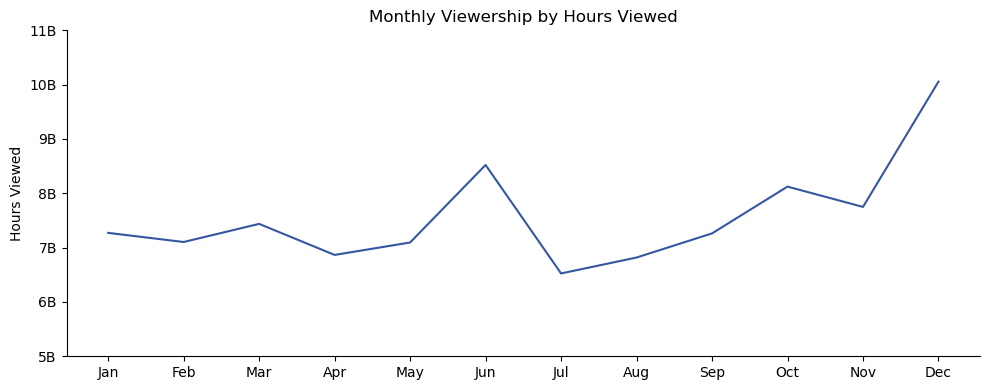

In [84]:
plt.figure(figsize=(10, 4))

sns.lineplot(
    data=monthly_viewed_hours,
    x='Month Name',
    y='Hours Viewed',
    marker='',
    color='#3557A0'
)

def billion_formatter(value, params):
    """Formats tick labels to display billions with abbreviation."""
    if value >= 1e9:
        return f"{value / 1e9:.0f}B"
    elif value <= 1e9:
        return f"{value / 1e6:.0f}M"
    else:
        return f"{value:.1f}"
# Format y-axis tick labels
plt.gca().yaxis.set_major_formatter(billion_formatter)

plt.title('Monthly Viewership by Hours Viewed')
plt.xlabel('')
plt.ylim(5000000000, 11000000000)

sns.despine()
plt.tight_layout()
plt.show()

-   #### Key Insights:
    -  The number of hours viewed starts at around 7.5 billion in January, and then there's a slight dip in February, but it picks up again in March.
    -  From March to May, the viewership remains relatively stable, fluctuating between 7 billion and 8 billion hours, and June sees a noticeable peak, with approximately 9 billion hours viewed.
    -  After June, there's a decline in July, dropping to about 6.5 billion hours. From July onwards, there's a gradual increase, culminating in a significant rise in December, reaching the highest point of around 10.5 billion hours viewed.

        - This trend might be valuable for understanding viewer behavior, perhaps for optimizing content release strategies throughout the year.

In [85]:
# Now let's analyze the monthly viewership by content type
monthly_viewership_by_content_type = df.pivot_table(index='Month Name',
                                                     columns='Content Type',
                                                     values='Hours Viewed',
                                                     aggfunc='sum').reset_index('Month Name')
# Melting the DataFrame to long-form
df_melted = pd.melt(monthly_viewership_by_content_type, id_vars='Month Name', var_name='Content Type', value_name="Hours Viewed")

# sorting the month name column
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_melted['Month Name'] = pd.Categorical(df_melted['Month Name'], categories=month_order, ordered=True)
df_melted = df_melted.sort_values('Month Name')
df_melted.head(2)

,Month Name,Content Type,Hours Viewed
4,Jan,Movie,2.275900e+09
16,Jan,Show,4.995700e+09


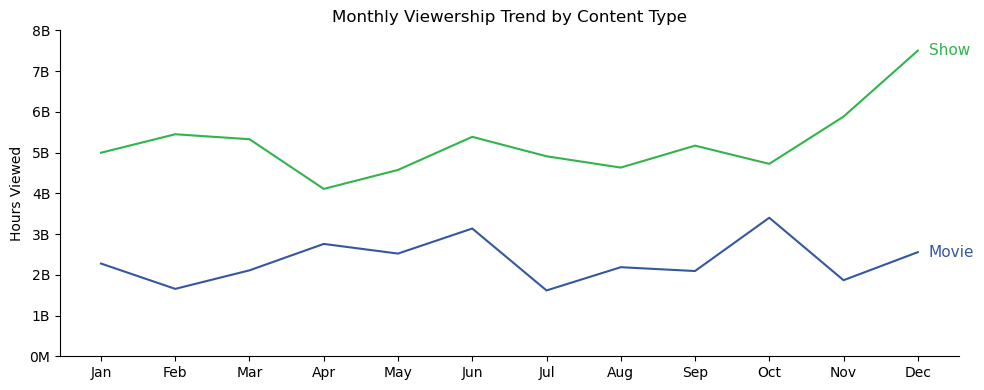

In [86]:
colors = ['#3557A0', '#31B44C']

plt.figure(figsize=(10, 4))

sns.lineplot(data=df_melted,
             x='Month Name',
             y='Hours Viewed',
             hue='Content Type',
             palette=colors,
             legend=False,
                         
             )

def billion_formatter(value, params):
    """Formats tick labels to display billions with abbreviation."""
    if value >= 1e9:
        return f"{value / 1e9:.0f}B"
    elif value <= 1e9:
        return f"{value / 1e6:.0f}M"
    else:
        return f"{value:.1f}"
# Format y-axis tick labels
plt.gca().yaxis.set_major_formatter(billion_formatter)


# Annotating the end of each line
content_types = df_melted['Content Type'].unique()
for content_type in content_types:
    last_value = df_melted[df_melted['Content Type'] == content_type].iloc[-1]
    plt.annotate(content_type,
                 xy=(last_value['Month Name'], last_value['Hours Viewed']),
                 xytext=(8, 0),
                 textcoords='offset points',
                 ha='left',
                 va='center',
                 color=colors[np.where(content_types == content_type)[0][0]],
                 size=11
                 )

plt.title('Monthly Viewership Trend by Content Type')
plt.xlabel('')
plt.ylim(0, 8000000000)


sns.despine()
plt.tight_layout()
plt.show()

-   #### Key Insights:
    -  Shows consistently have higher viewership than movies throughout the year.

    -  Show viewership dips around mid-year, reaching its lowest in June. However, it recovers and increases significantly towards the end of the year, peaking in December.

    -   Movie viewership remains relatively stable with minor fluctuations, peaking slightly in October and ending the year with a slight increase from its starting point.

-   In summary, shows appear to be more popular than movies, particularly towards the end of the year. This could be due to various factors such as new show releases, holiday seasons, or year-end specials. Meanwhile, movie viewership remains relatively consistent with only minor changes.   

In [87]:
# create a function to define seasons
def seasons(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(seasons)


df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Year,Month,Day,Month Name,Season
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,2023,3,23.0,Mar,Spring
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,2023,1,5.0,Jan,Winter


In [88]:
seasonal_df = df.groupby('Season')['Hours Viewed'].sum()

seasonal_df = seasonal_df.reset_index()

seasonal_df = seasonal_df.sort_values(by='Hours Viewed', ascending=False)

seasonal_df

,Season,Hours Viewed
0,Fall,9.070880e+10
3,Winter,2.443110e+10
2,Summer,2.186460e+10
1,Spring,2.139740e+10


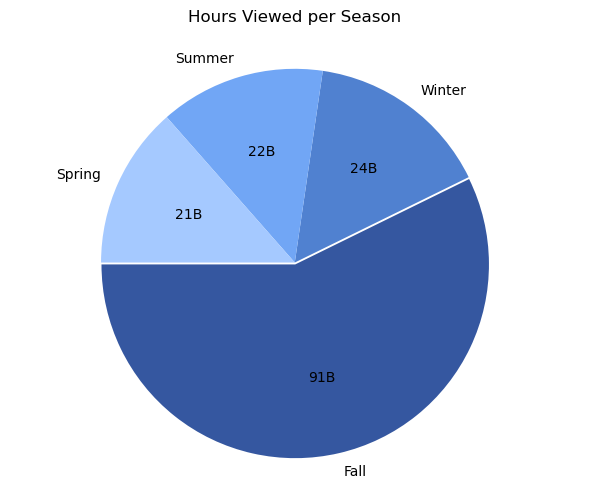

In [89]:
labels = seasonal_df['Season']
sizes = seasonal_df['Hours Viewed']

plt.figure(figsize=(6, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f'{p * sum(sizes) / 100000000000:,.0f}B',
    colors=['#3557A0', '#5081D0', '#71A6F5', '#A5C9FF'],
    startangle=-180,
    explode=(0.01,0,0,0)
)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.title('Hours Viewed per Season', pad=20)


plt.tight_layout()
plt.show()

-   #### Key Insights:
    -  **Fall** Dominates With 91 billion hours viewed, **Fall** significantly outshines the other seasons. This could indicate that viewers are particularly engaged during this time, *possibly due to new releases or holiday-related content*.

    -  **Winter** follows with 24 billion hours viewed. *This season might also benefit from holiday programming and people spending more time indoors.*

    -   **Summer (22 billion) and Spring (21 billion)** have relatively similar viewership numbers, though they are notably lower than Fall and Winter. This could be due to people spending more time outdoors and on vacations.

-   ***Overall Insight:*** There is a clear trend of higher viewership during Fall and Winter, suggesting these seasons are prime times for content consumption..   

_____

**Summary:**

1. Global Availability Analysis
The analysis examined the distribution of Netflix's availability across various regions. It was observed that Netflix has a robust presence in North America, Europe, and Asia, contributing significantly to the global viewership. Regional content partnerships and localized content play a vital role in increasing viewership and subscriptions.

2. Release Date Analysis
Analyzing release dates highlighted key trends in content consumption. Shows released during the Fall and Winter seasons see higher engagement, possibly due to holiday periods and increased indoor activities. Additionally, strategic release dates aligned with local festivals and holidays also boost viewership.

3. Hours Viewed Analysis
Hours viewed per season indicated that Fall is the peak season with 91 billion hours viewed, followed by Winter with 24 billion hours. Summer and Spring have relatively lower but comparable viewership at 22 billion and 21 billion hours, respectively. This suggests that content released in Fall and Winter garners the highest audience engagement.

4. Language Analysis
Language analysis revealed that while English remains the dominant language on the platform, there is a growing trend in non-English content consumption. Spanish, Korean, and French content showed significant viewership, underlining the importance of diverse and localized content to cater to a global audience.

5. Seasonal Analysis
Seasonal trends were apparent in viewing habits, with notable peaks during Fall and Winter. This could be attributed to holiday-related content and seasonal marketing campaigns. The data suggests that strategic content releases during these seasons can maximize viewership and subscription rates.





- **Prepared by:** Mohamed Fawzi  --  Email: modyreturn@gmail.com  -- GitHub repository: https://github.com/modyreturn/Netflix-Analysis